In [3]:
 
import numpy as np                
import pandas as pd               
import seaborn as sns             
import matplotlib.pyplot as plt   
import scipy.stats                
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
import os
print(os.listdir("/content"))

['.config', 'Iris.csv', 'sample_data']


In [4]:
iris = pd.read_csv("/content/Iris.csv")
print(iris.head())
print(iris.info())
print(iris.shape)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
(150, 6)


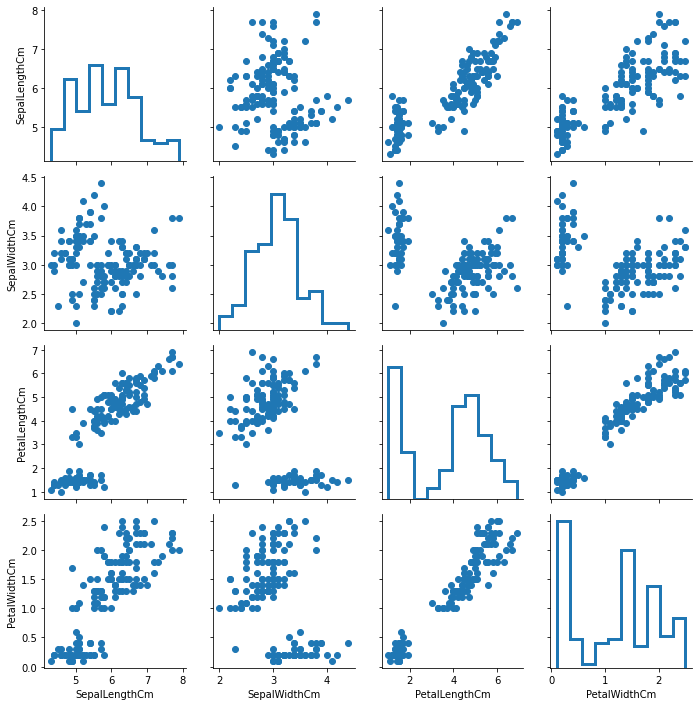

In [6]:
g = sns.PairGrid(iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]])
g.map_diag(plt.hist, histtype="step", linewidth=3)
g.map_offdiag(plt.scatter)

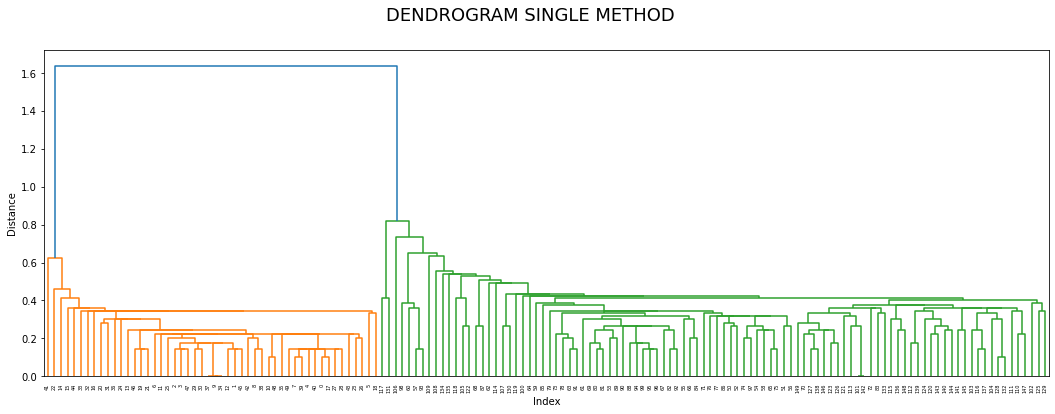

In [7]:
dist_sin = linkage(iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]],method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [8]:
from scipy.cluster.hierarchy import fcluster
iris_SM=iris.copy()

iris_SM['2_clust']=fcluster(dist_sin,2, criterion='maxclust')
iris_SM['3_clust']=fcluster(dist_sin,3, criterion='maxclust')
iris_SM.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,2_clust,3_clust
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,1


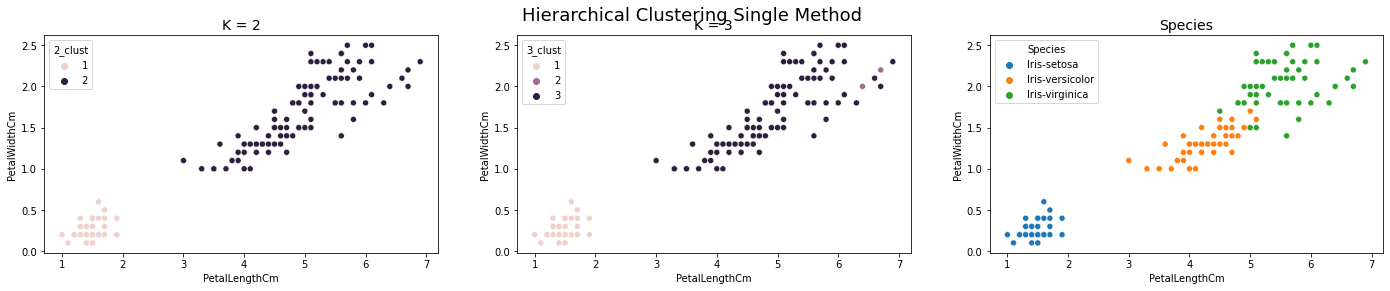

In [9]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm", data=iris_SM, hue="2_clust")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm", data=iris_SM, hue="3_clust")

plt.subplot(1,3,3)
plt.title("Species",fontsize=14)
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm", data=iris_SM, hue="Species")


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


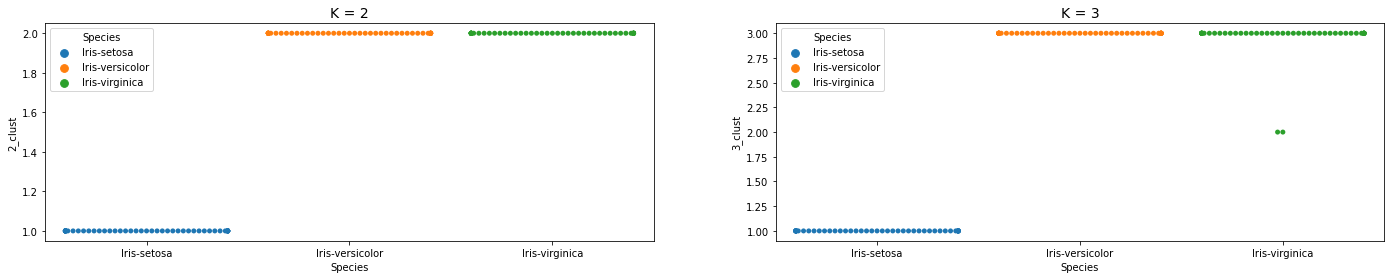

In [10]:
plt.figure(figsize=(24,4))
plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.swarmplot(x="Species",y="2_clust", data=iris_SM, hue="Species")

plt.subplot(1,2,2)
plt.title("K = 3",fontsize=14)
sns.swarmplot(x="Species",y="3_clust", data=iris_SM, hue="Species")


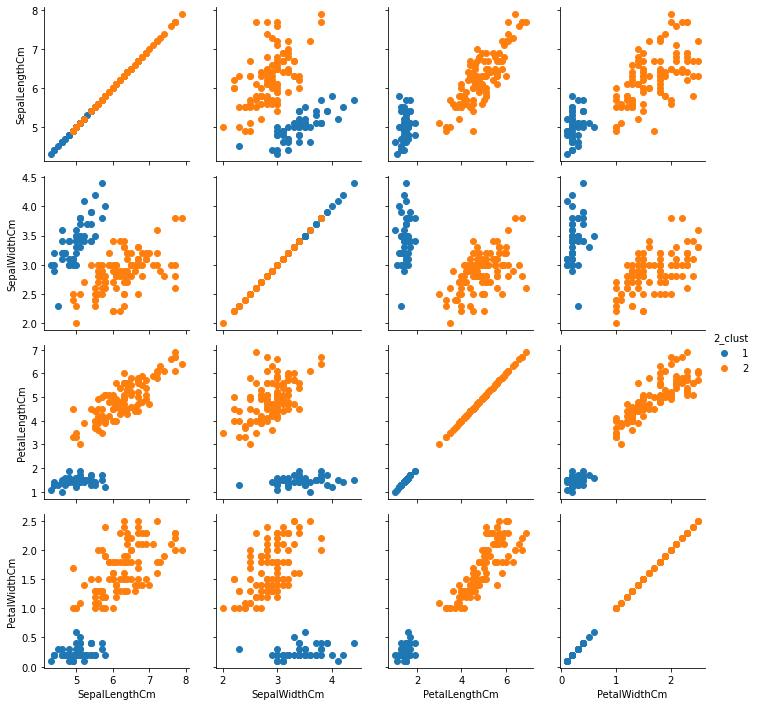

In [11]:
g = sns.PairGrid(iris_SM, vars=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"], hue='2_clust')
g.map(plt.scatter)
g.add_legend()

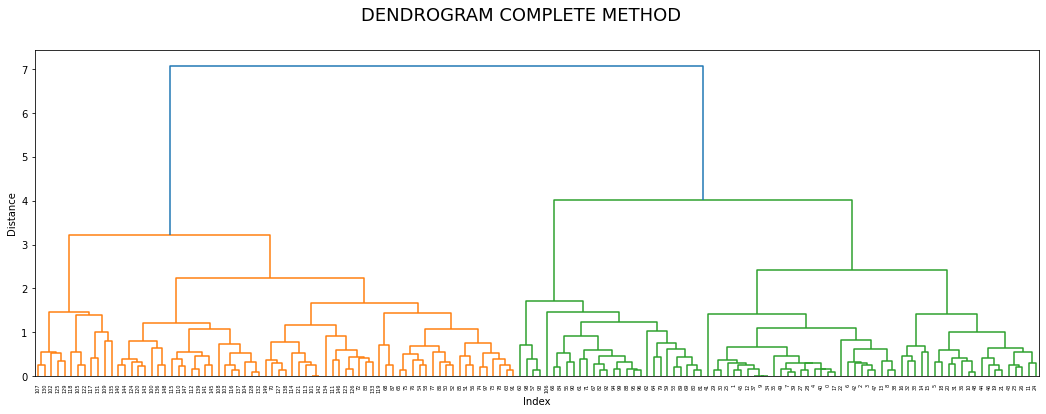

In [12]:
dist_comp = linkage(iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]],method="complete")
plt.figure(figsize=(18,6))
dendrogram(dist_comp, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM COMPLETE METHOD",fontsize=18) 
plt.show()